<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 78.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 53.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 6.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 116.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 114.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 8.5 MB/s eta 0:00:00
 

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [16]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [17]:
## Write your code here
# Identify missing values
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values)

# Drop rows with missing values in critical columns
df_cleaned = df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'])

# Alternatively, you can fill missing values with a placeholder or mode
# df['Employment'].fillna('Unknown', inplace=True)
# df['JobSat'].fillna(df['JobSat'].mode()[0], inplace=True)
# df['RemoteWork'].fillna('Unknown', inplace=True)

# Verify the handling of missing values
missing_values_after = df_cleaned[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values_after)

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


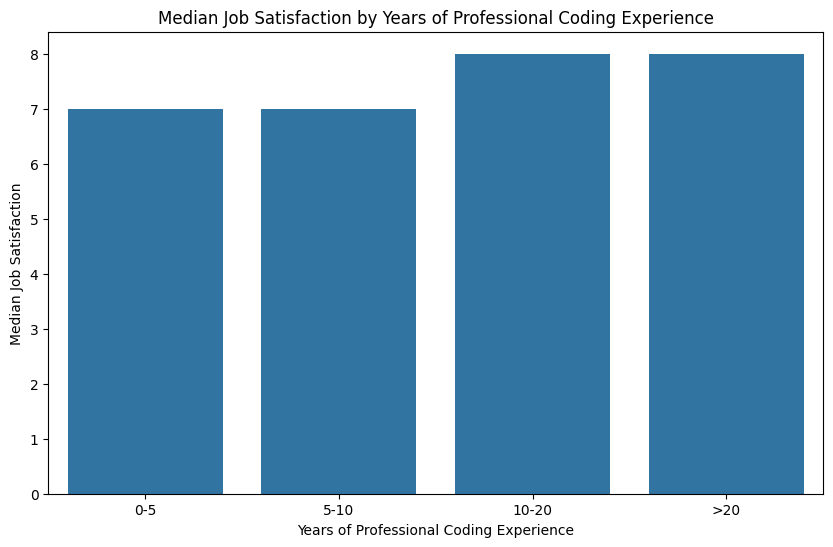

In [18]:
## Write your code here
# Convert YearsCodePro to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create experience ranges
experience_bins = [0, 5, 10, 20, float('inf')]
experience_labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=experience_bins, labels=experience_labels, include_lowest=True)

# Calculate median JobSat for each experience range
median_jobsat = df.groupby('ExperienceRange', observed=False)['JobSat'].median().reset_index()

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.barplot(data=median_jobsat, x='ExperienceRange', y='JobSat')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


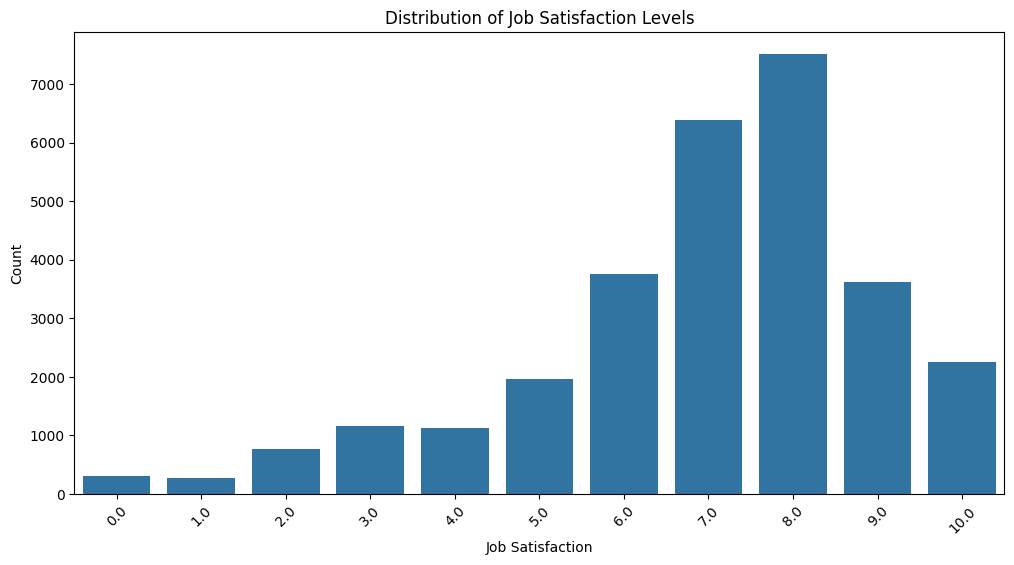

In [20]:
# Plot the distribution of JobSat values using a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='JobSat')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction Levels')
plt.xticks(rotation=45)
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


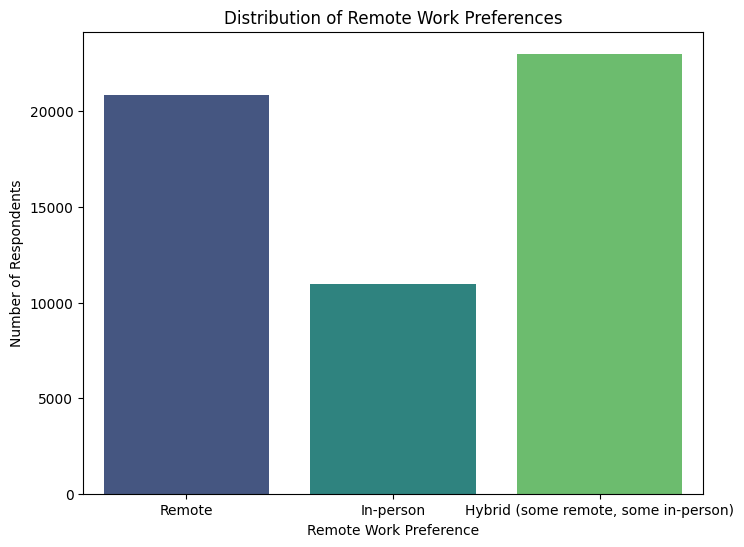


Cross-tabulation of Remote Work by Employment:
 RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17281   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, but looking fo...                                     2   
Student, full-time;Not employed

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for RemoteWork distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='RemoteWork', data=df, hue='RemoteWork', palette="viridis", legend=False)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.show()

# Cross-tabulation of RemoteWork by Employment
employment_remote_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'])
print("\nCross-tabulation of Remote Work by Employment:\n", employment_remote_crosstab)

# Cross-tabulation of RemoteWork by DevType (Job Role)

# Fill missing values in DevType with 'Unknown' (corrected for chained assignment warning)
df['DevType'] = df['DevType'].fillna('Unknown')

# Function to safely check for substring in potentially NaN values
def safe_contains(series, substring):
    return series.astype(str).str.contains(substring, case=False, na=False)

# Create a crosstab for each DevType
dev_types = ['Developer', 'Engineer', 'Data scientist', 'Data analyst', 'Student', 'Academic', 'Educator', 'Scientist', 'Other']
for dev_type in dev_types:
    df[dev_type] = safe_contains(df['DevType'], dev_type)

devtype_remote_crosstab = pd.DataFrame()
for dev_type in dev_types:
    devtype_remote_crosstab[dev_type] = df.groupby(dev_type)['RemoteWork'].value_counts(normalize=True).unstack().get('Yes', 0)

print("\nCross-tabulation of Remote Work by DevType (Percentage of 'Yes' for Remote Work):\n", devtype_remote_crosstab)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Previous code for count plot and Employment cross-tabulation remains the same)

# Cross-tabulation of RemoteWork by DevType (Job Role)

# Fill missing values in DevType with 'Unknown'
df['DevType'] = df['DevType'].fillna('Unknown')

# Split the DevType string into a list of individual roles
df['DevType_List'] = df['DevType'].str.split(';')

# Explode the list so each role gets its own row
df_exploded = df.explode('DevType_List')

# Remove leading/trailing whitespace from exploded DevType values
df_exploded['DevType_List'] = df_exploded['DevType_List'].str.strip()

# Calculate the percentage of "Remote" for each DevType
devtype_remote = df_exploded.groupby('DevType_List')['RemoteWork'].value_counts(normalize=True).unstack()
devtype_remote_yes = devtype_remote.get('Remote', pd.Series(dtype='float64'))  # Handle cases where 'Remote' is missing

print("\nCross-tabulation of Remote Work by DevType (Percentage of 'Remote' for each DevType):\n", devtype_remote_yes)

#Clean up the extra columns created
df.drop(columns='DevType_List', inplace=True)
df_exploded.drop(columns='DevType_List', inplace=True)


Cross-tabulation of Remote Work by DevType (Percentage of 'Remote' for each DevType):
 DevType_List
Academic researcher                              0.120167
Blockchain                                       0.712871
Cloud infrastructure engineer                    0.464580
Data engineer                                    0.386617
Data or business analyst                         0.259494
Data scientist or machine learning specialist    0.307443
Database administrator                           0.318471
Designer                                         0.416058
DevOps specialist                                0.379381
Developer Advocate                               0.616162
Developer Experience                             0.457286
Developer, AI                                    0.358811
Developer, QA or test                            0.466395
Developer, back-end                              0.451296
Developer, desktop or enterprise applications    0.314855
Developer, embedded applicati

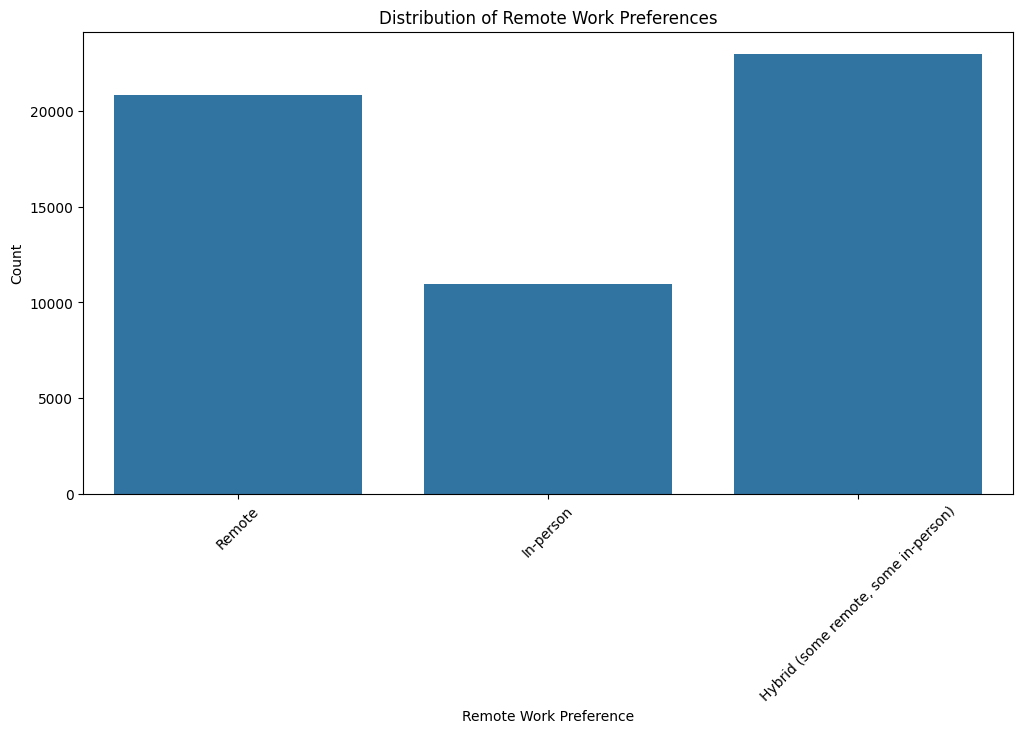

Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Not employed, and not looking for work","Employed, full-time;Not employed, but looking for work","Employed, full-time;Not employed, but looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Retired","Employed, full-time;Student, full-time","Employed, full-time;Student, full-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time;Employed, part-time","Employed, full-t

In [26]:
## Write your code here
# Count plot to show remote work distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='RemoteWork')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.title('Distribution of Remote Work Preferences')
plt.xticks(rotation=45)
plt.show()

# Cross-tabulate remote work preferences by employment type and job roles
remote_work_crosstab = pd.crosstab(df['RemoteWork'], df['Employment'], normalize='index')
remote_work_crosstab

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_81/3295545805.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_counts.head(10), x='Count', y='Programming Language', palette='viridis')


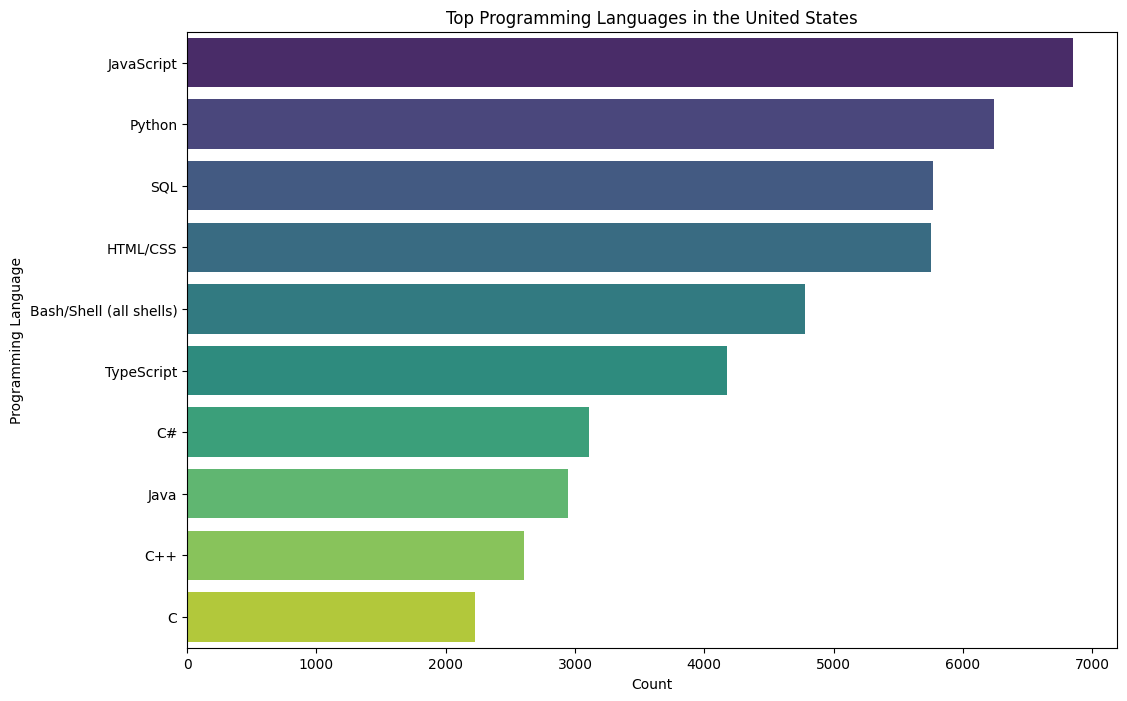

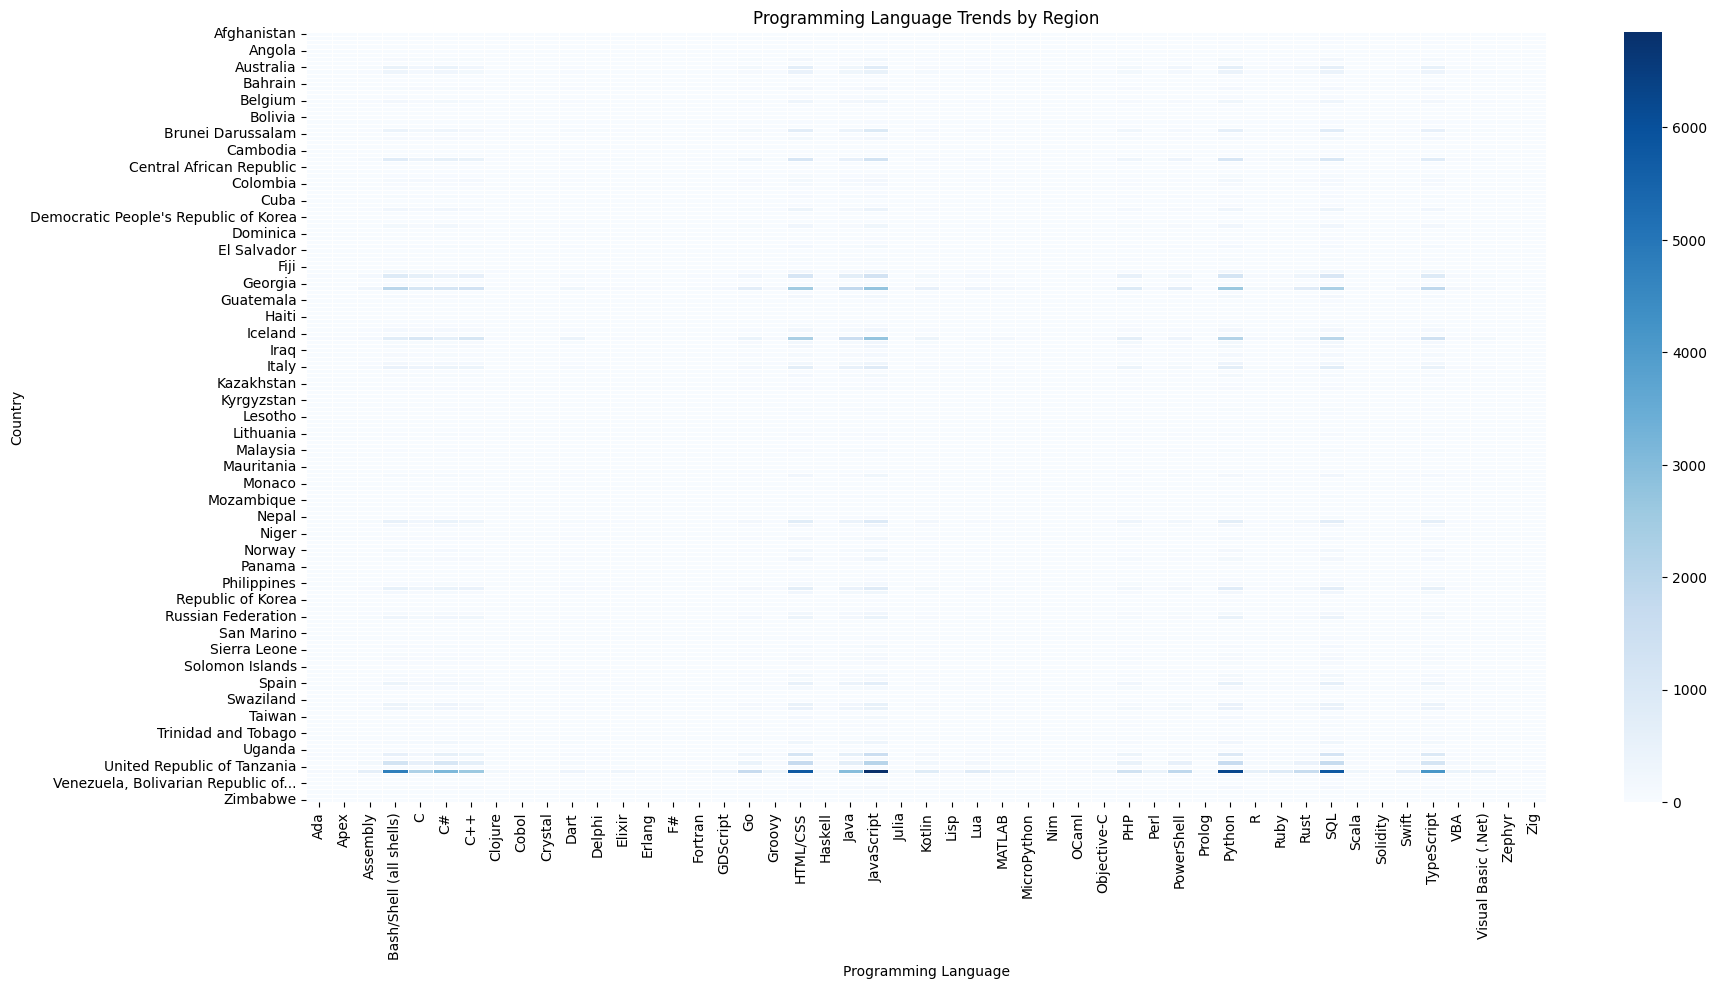

In [29]:
# Explode the LanguageHaveWorkedWith column to analyze individual languages
df_exploded = df.assign(LanguageHaveWorkedWith=df['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Filter data by a specific country (e.g., 'United States of America')
country_data = df_exploded[df_exploded['Country'] == 'United States of America']

# Count the occurrences of each programming language
language_counts = country_data['LanguageHaveWorkedWith'].value_counts().reset_index()
language_counts.columns = ['Programming Language', 'Count']

# Plot the top programming languages in the specified country
plt.figure(figsize=(12, 8))
sns.barplot(data=language_counts.head(10), x='Count', y='Programming Language', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.title('Top Programming Languages in the United States')
plt.show()

# Optionally, visualize trends for multiple regions using a heatmap
# Create a pivot table with countries as rows and programming languages as columns
language_region_pivot = df_exploded.pivot_table(index='Country', columns='LanguageHaveWorkedWith', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(language_region_pivot, cmap='Blues', linewidths=.5)
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.title('Programming Language Trends by Region')
plt.show()

/tmp/ipykernel_81/870392618.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_region['LanguageHaveWorkedWith'].fillna('Unknown', inplace=True)


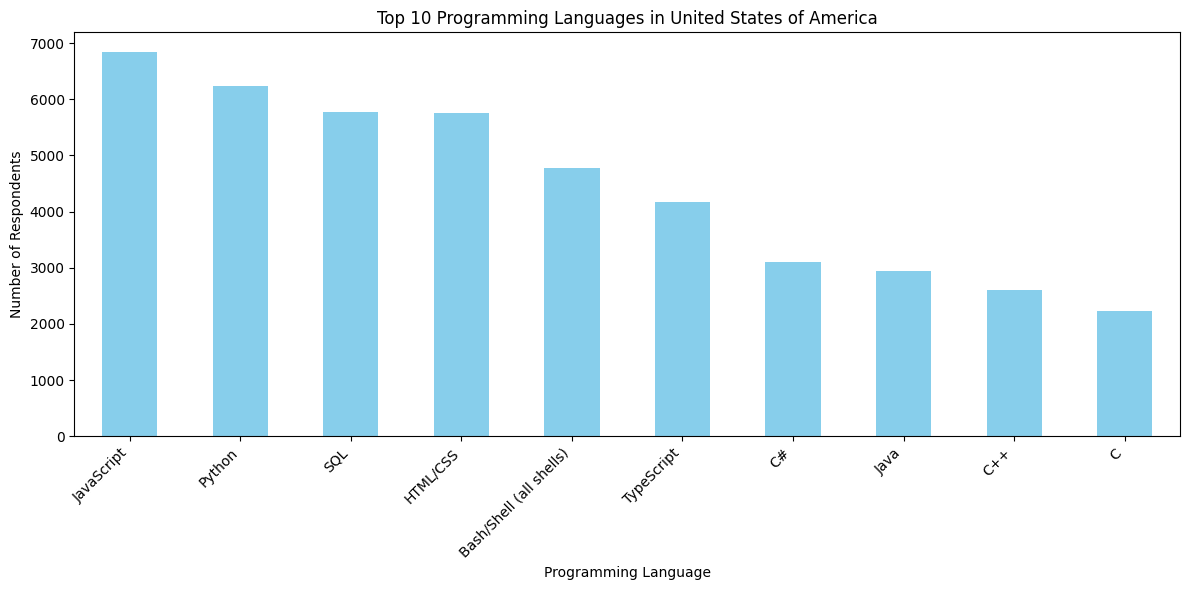

/tmp/ipykernel_81/870392618.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_region['LanguageHaveWorkedWith'].fillna('Unknown', inplace=True)


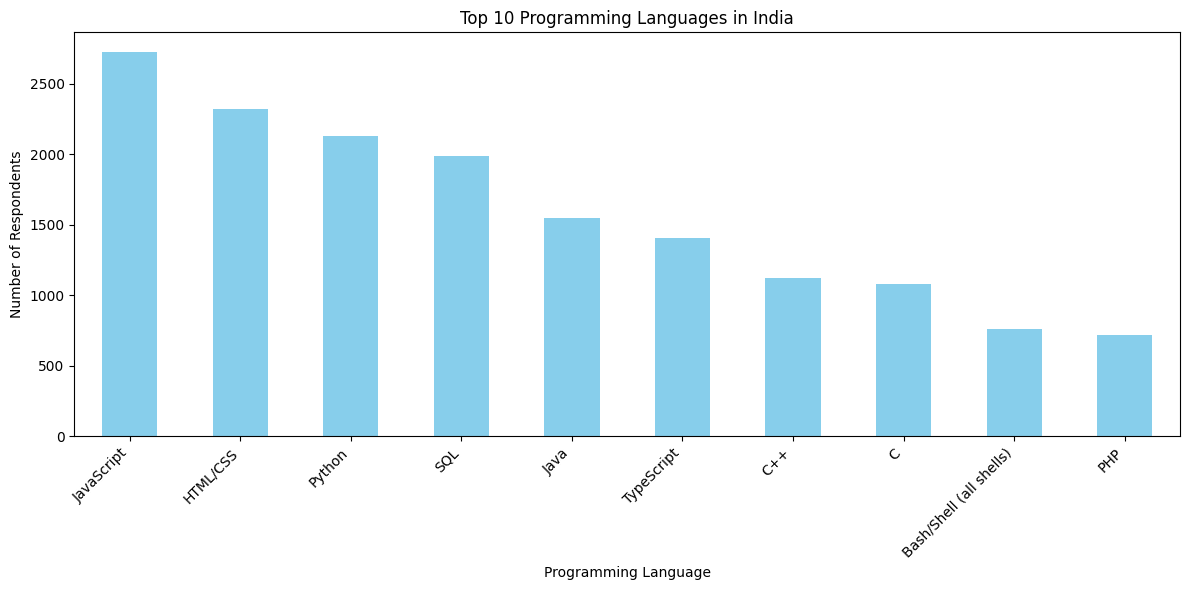

/tmp/ipykernel_81/870392618.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_region['LanguageHaveWorkedWith'].fillna('Unknown', inplace=True)


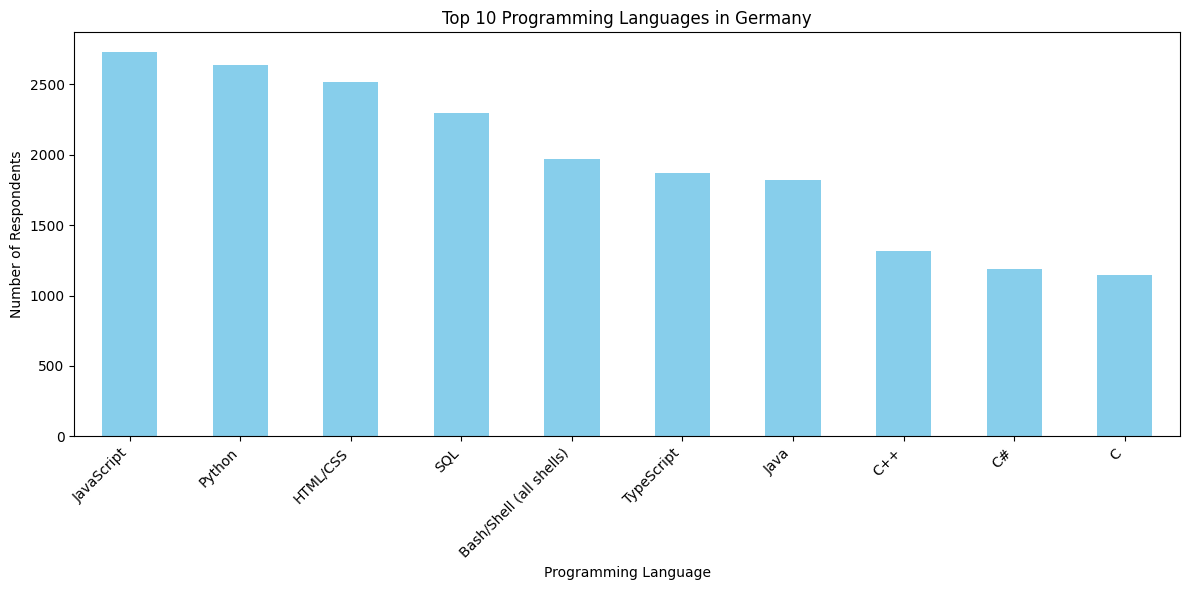

/tmp/ipykernel_81/870392618.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_region['LanguageHaveWorkedWith'].fillna('Unknown', inplace=True)


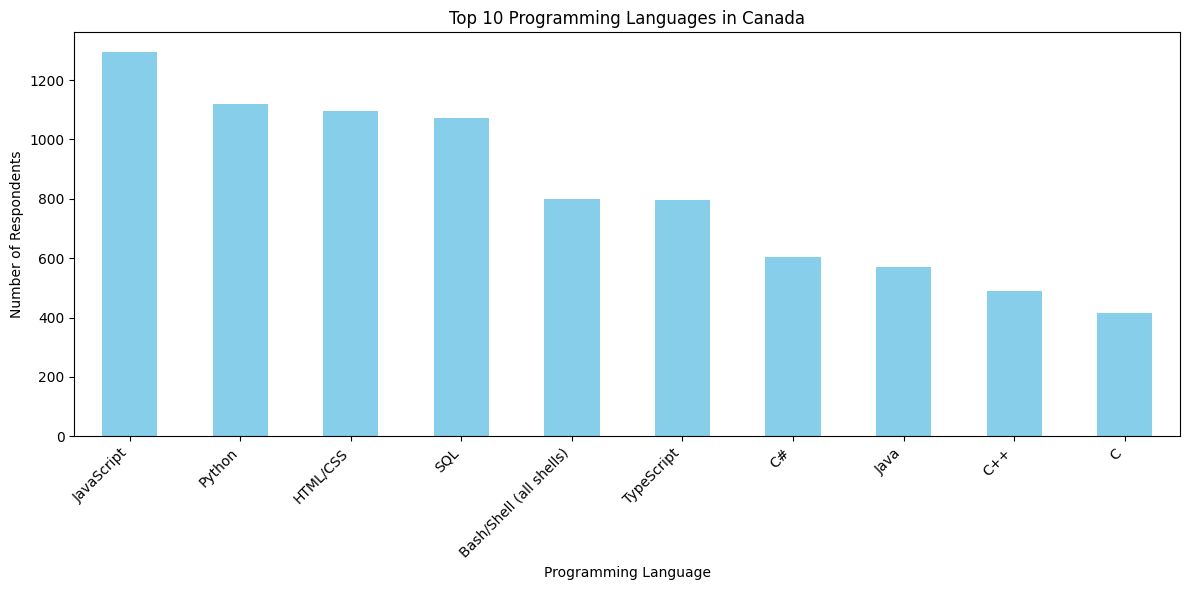

/tmp/ipykernel_81/870392618.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_region['LanguageHaveWorkedWith'].fillna('Unknown', inplace=True)


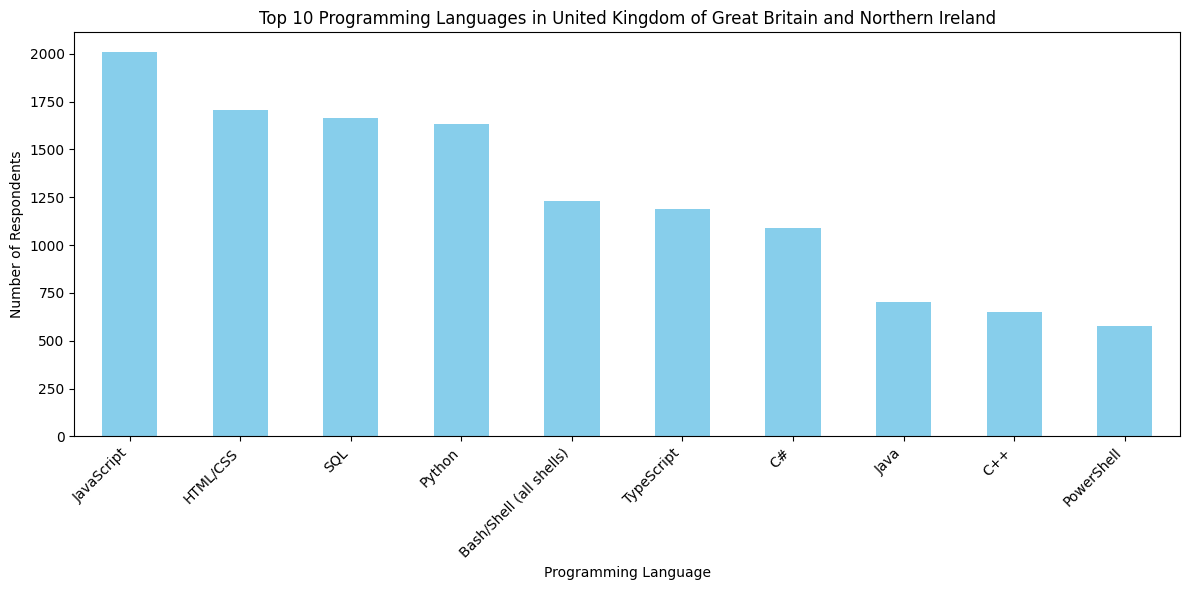

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to safely check for substring in potentially NaN values
def safe_contains(series, substring):
    return series.astype(str).str.contains(substring, case=False, na=False)

# Analyze language trends for specific regions (e.g., 'United States of America', 'India', 'Germany')
regions = ['United States of America', 'India', 'Germany', 'Canada', 'United Kingdom of Great Britain and Northern Ireland']

for region in regions:
    # Filter data for the current region
    df_region = df[df['Country'] == region].copy()

    # Handle missing values and split the languages
    df_region['LanguageHaveWorkedWith'].fillna('Unknown', inplace=True)
    df_region['LanguageHaveWorkedWith_List'] = df_region['LanguageHaveWorkedWith'].str.split(';')

    # Explode the language list
    df_region_exploded = df_region.explode('LanguageHaveWorkedWith_List')
    df_region_exploded['LanguageHaveWorkedWith_List'] = df_region_exploded['LanguageHaveWorkedWith_List'].str.strip()

    # Count language occurrences
    language_counts = df_region_exploded['LanguageHaveWorkedWith_List'].value_counts().drop(labels='Unknown', errors='ignore')

    # Visualize the top languages (e.g., top 10)
    top_n = min(10, len(language_counts))  # Show top 10 or fewer if there are less
    top_languages = language_counts.head(top_n)

    plt.figure(figsize=(12, 6))
    top_languages.plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Programming Languages in {region}')
    plt.xlabel('Programming Language')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    df_region.drop(columns='LanguageHaveWorkedWith_List', inplace=True)
    df_region_exploded.drop(columns='LanguageHaveWorkedWith_List', inplace=True)

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


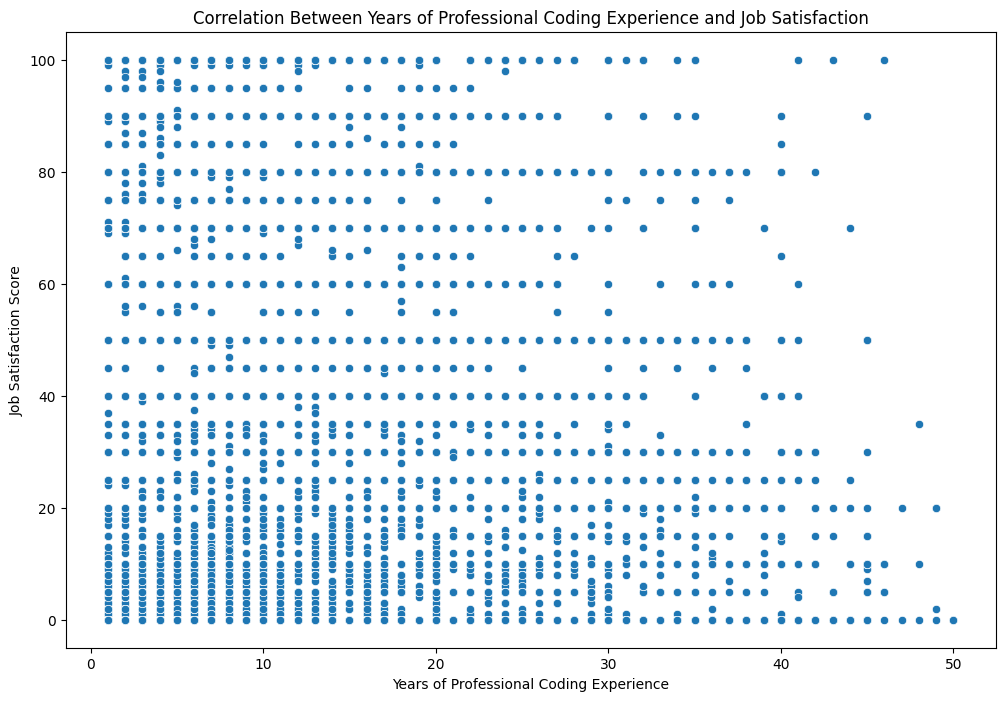

In [31]:
# Convert YearsCodePro to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Plot the scatter plot for YearsCodePro and JobSatPoints_1
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.title('Correlation Between Years of Professional Coding Experience and Job Satisfaction')
plt.show()


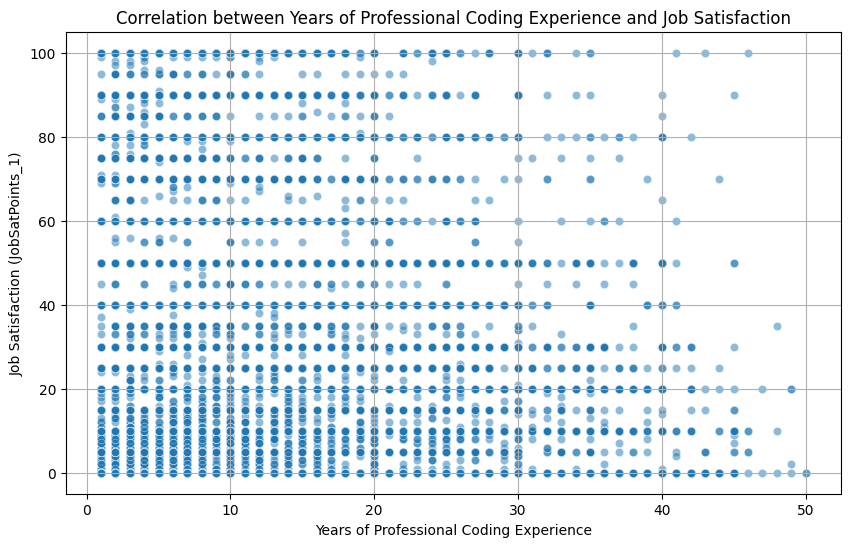

Correlation coefficient: -0.03284640929635467


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'YearsCodePro' to numeric, handling non-numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where either 'YearsCodePro' or 'JobSatPoints_1' is NaN
df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'], inplace=True)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df, alpha=0.5)  # Added alpha for better visualization with overlapping points
plt.title('Correlation between Years of Professional Coding Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.grid(True) #Add grid for better readability
plt.show()

# Calculate and print the correlation coefficient
correlation = df['YearsCodePro'].corr(df['JobSatPoints_1'])
print(f"Correlation coefficient: {correlation}")

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                            0.755344   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                   0.801925   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                0.795977   
Primary/elementary school                                      0.688525   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                 0.821296   
Secondary school (e.g. American high school, Ge...             0.609503   
Some college/university study without earning a...             0.692136   
Something else                                                 0.734082   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

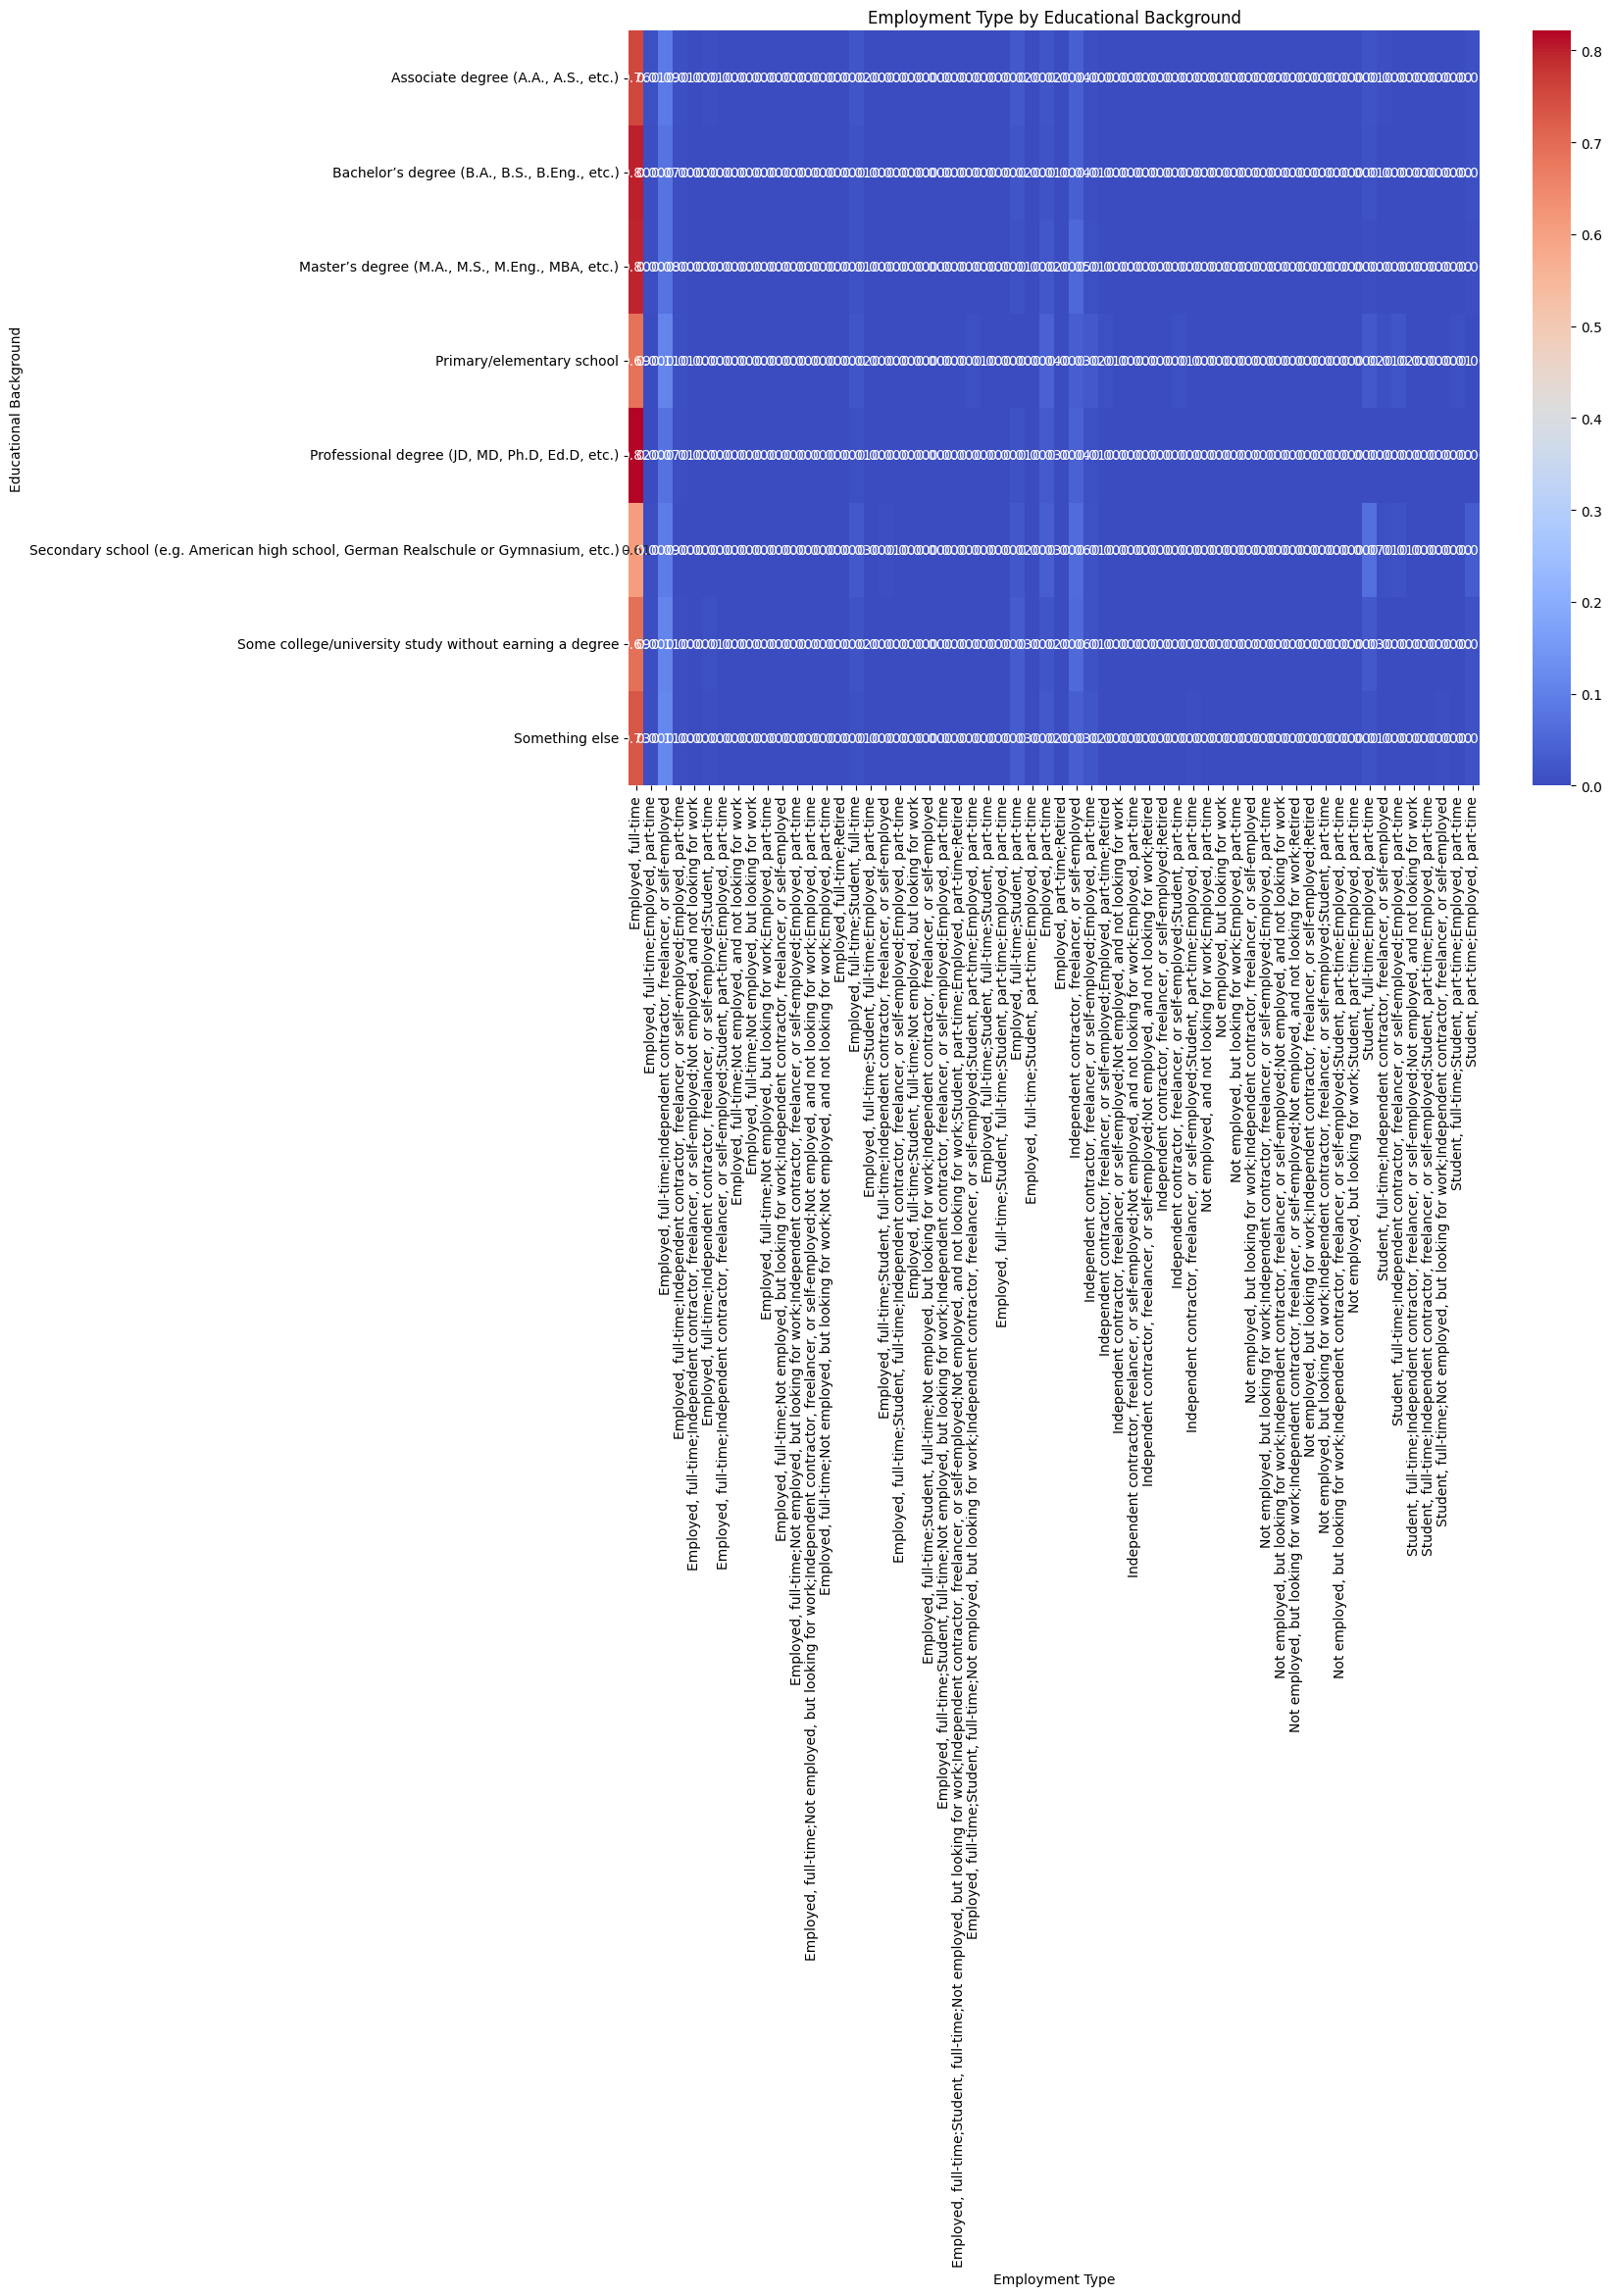

In [33]:
# Cross-tabulate educational background and employment type
education_employment_crosstab = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')
print(education_employment_crosstab)

# Visualize the cross-tabulation with a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(education_employment_crosstab, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Employment Type')
plt.ylabel('Educational Background')
plt.title('Employment Type by Educational Background')
plt.show()


Cross-tabulation of Educational Level and Employment Type:
 Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 636   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      10081   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    6410   
Primary/elementary school                                            84   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1103   
Secondary school (e.g. American high school, Ge...                  821   
Some college/university study without earning a...                 2174   
Something else                                                      196   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       

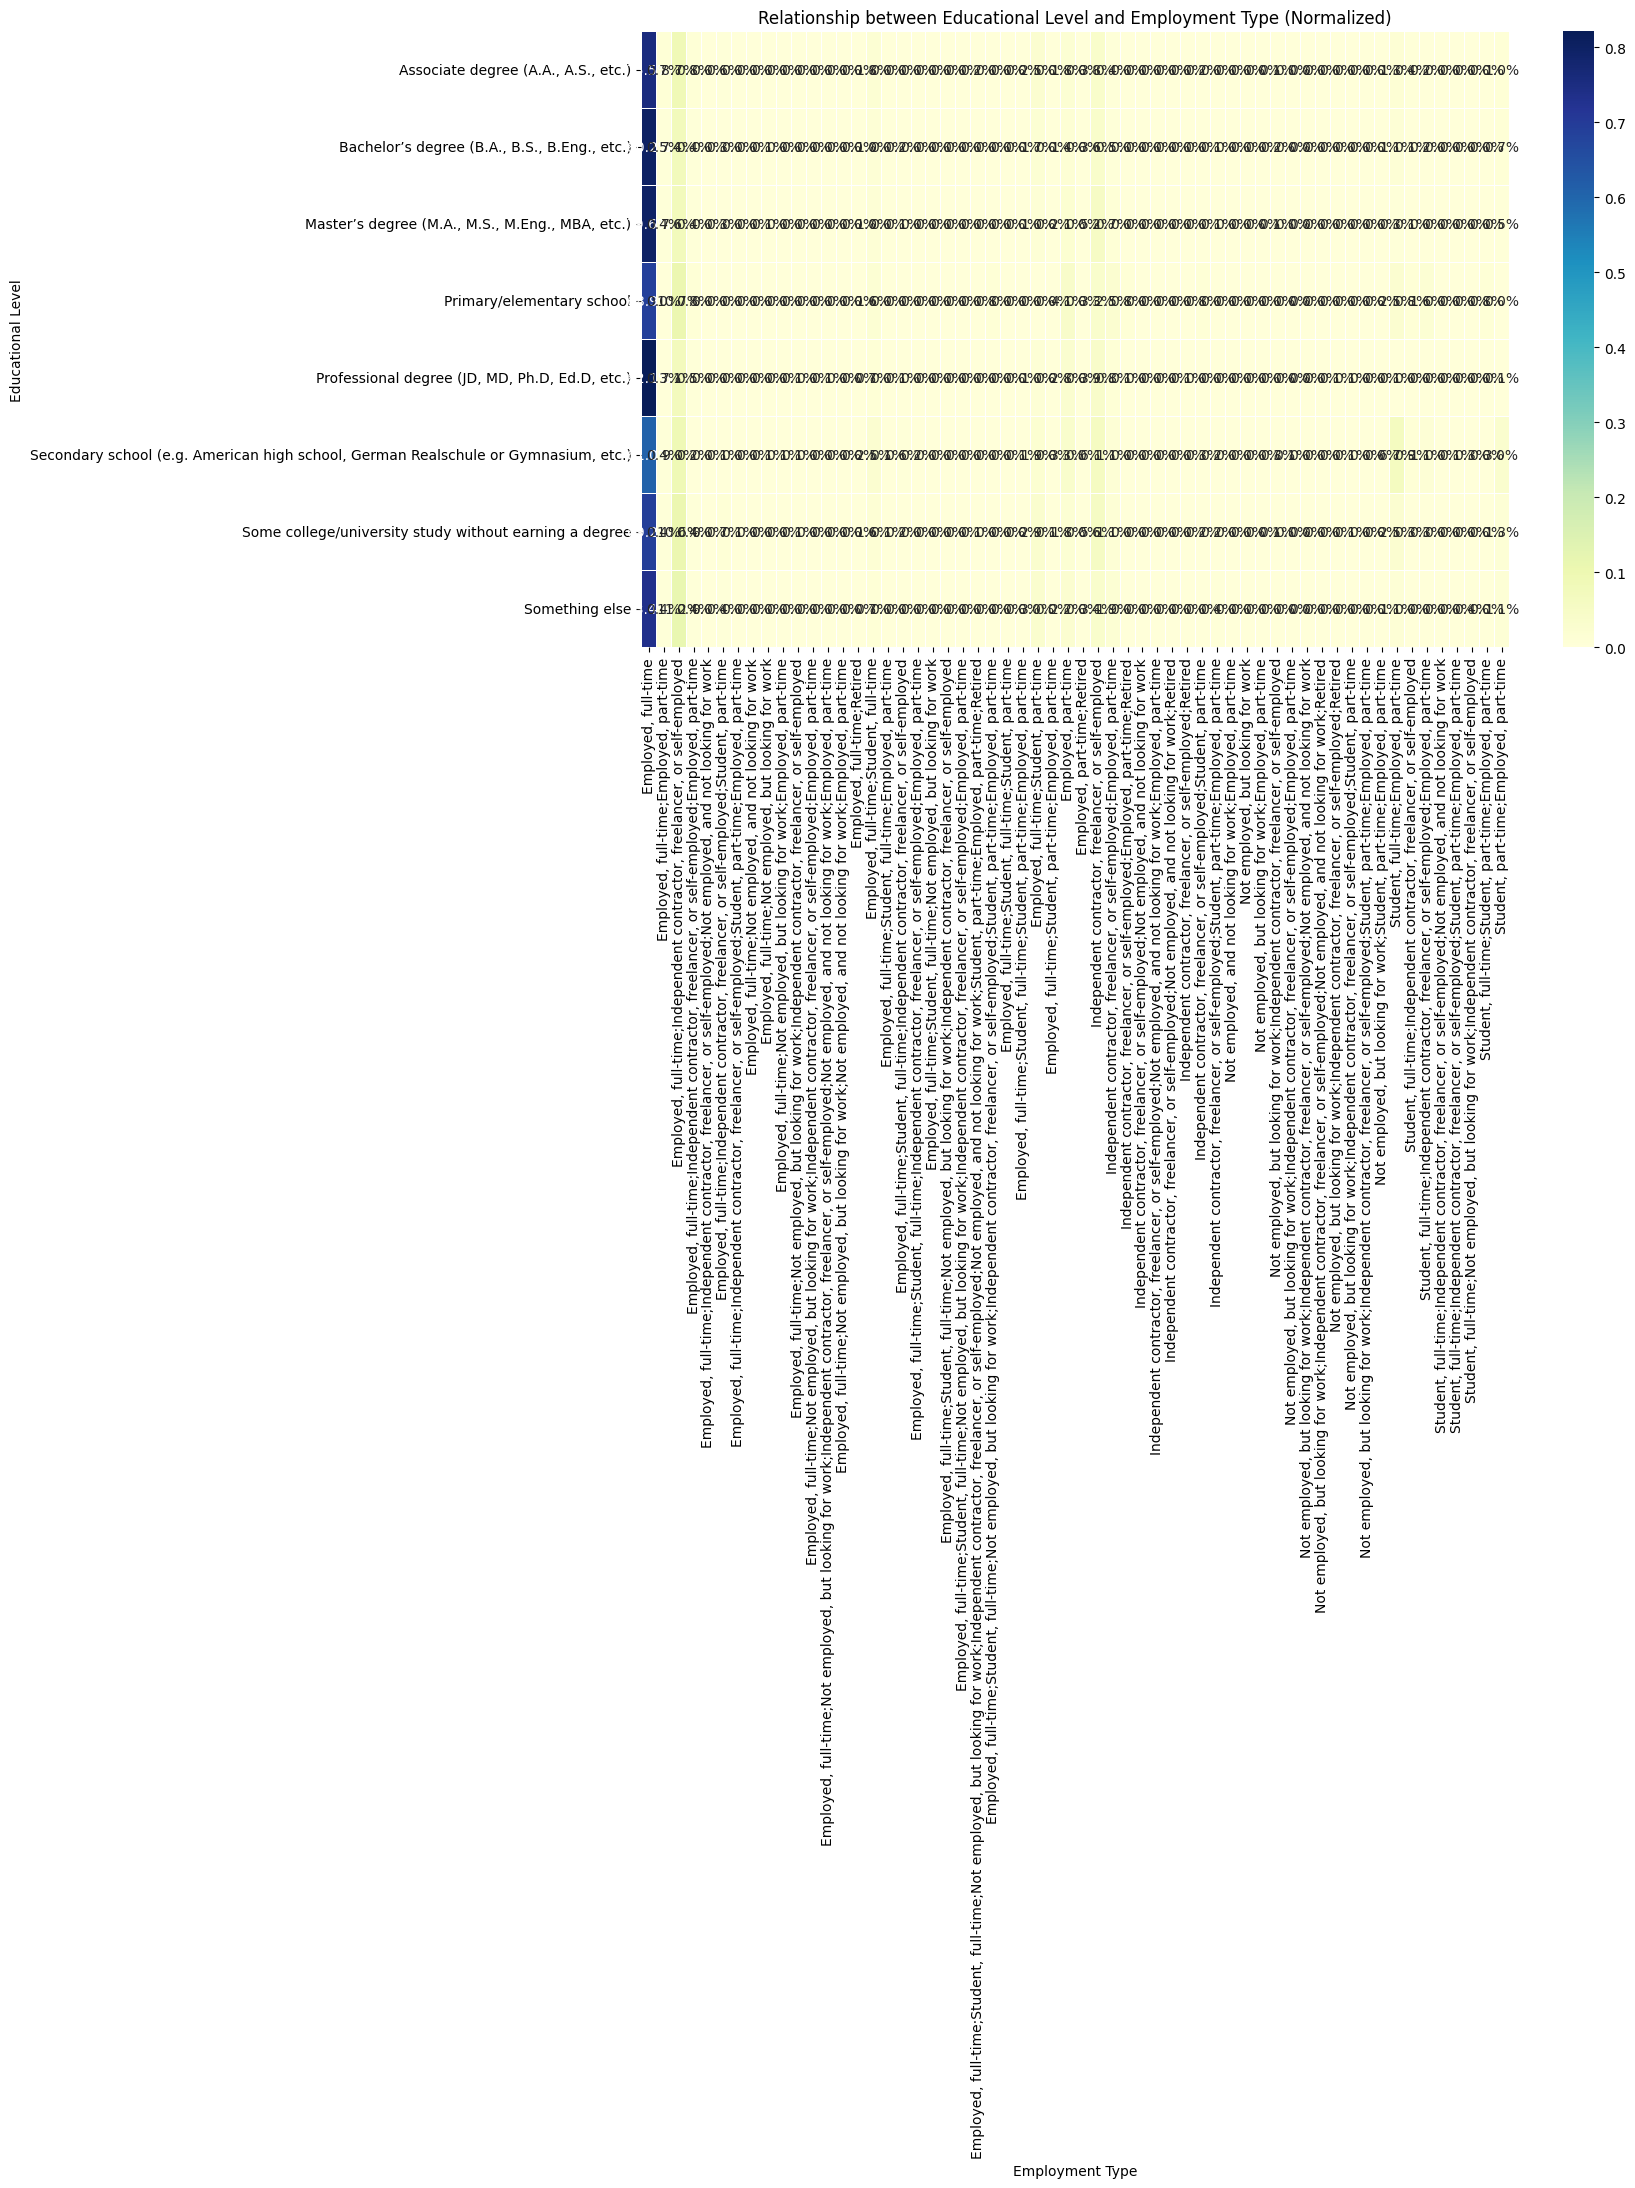

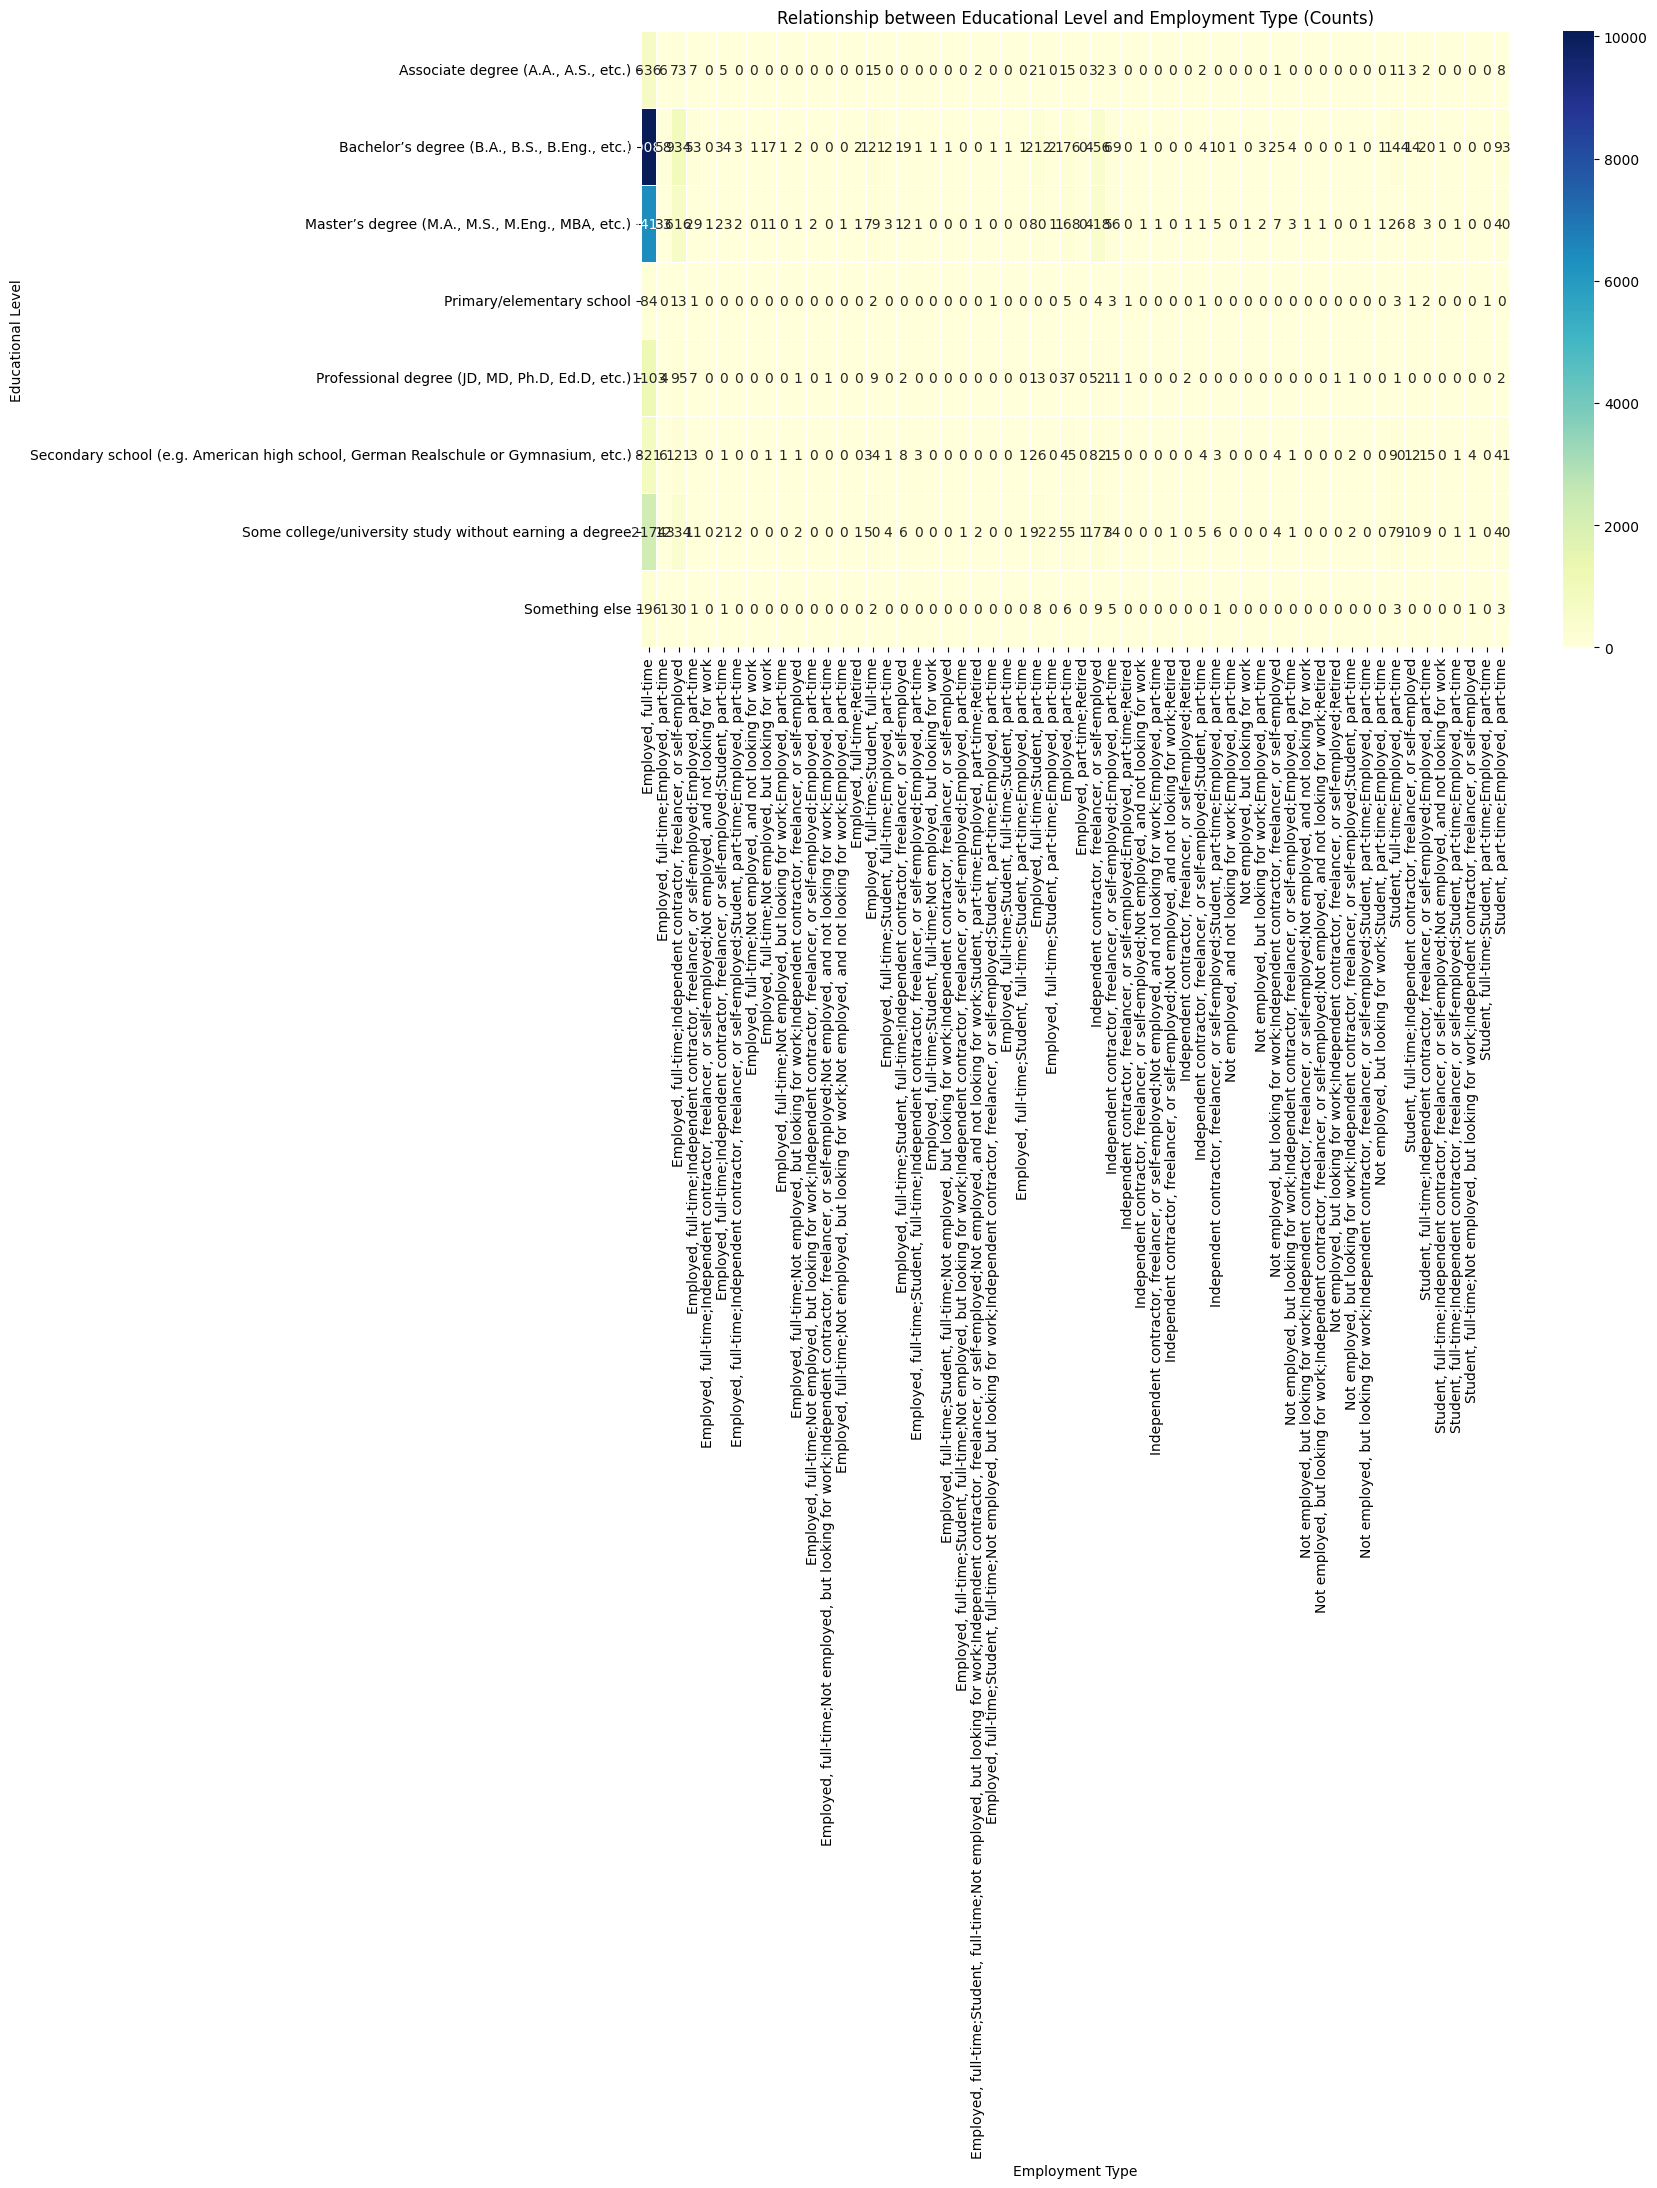

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-tabulation of EdLevel and Employment
edlevel_employment_crosstab = pd.crosstab(df['EdLevel'], df['Employment'])
print("Cross-tabulation of Educational Level and Employment Type:\n", edlevel_employment_crosstab)

# Normalize the cross-tabulation to show percentages within each EdLevel
edlevel_employment_crosstab_normalized = edlevel_employment_crosstab.div(edlevel_employment_crosstab.sum(axis=1), axis=0)

# Visualizing the normalized cross-tabulation
plt.figure(figsize=(14, 8))
sns.heatmap(edlevel_employment_crosstab_normalized, annot=True, cmap="YlGnBu", fmt=".1%", linewidths=.5) #fmt=".1%" to display percentages with one decimal place
plt.title('Relationship between Educational Level and Employment Type (Normalized)')
plt.xlabel('Employment Type')
plt.ylabel('Educational Level')
plt.yticks(rotation=0)
plt.show()

# Visualizing the original cross-tabulation
plt.figure(figsize=(14, 8))
sns.heatmap(edlevel_employment_crosstab, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5) #fmt="d" to display as integers
plt.title('Relationship between Educational Level and Employment Type (Counts)')
plt.xlabel('Employment Type')
plt.ylabel('Educational Level')
plt.yticks(rotation=0)
plt.show()

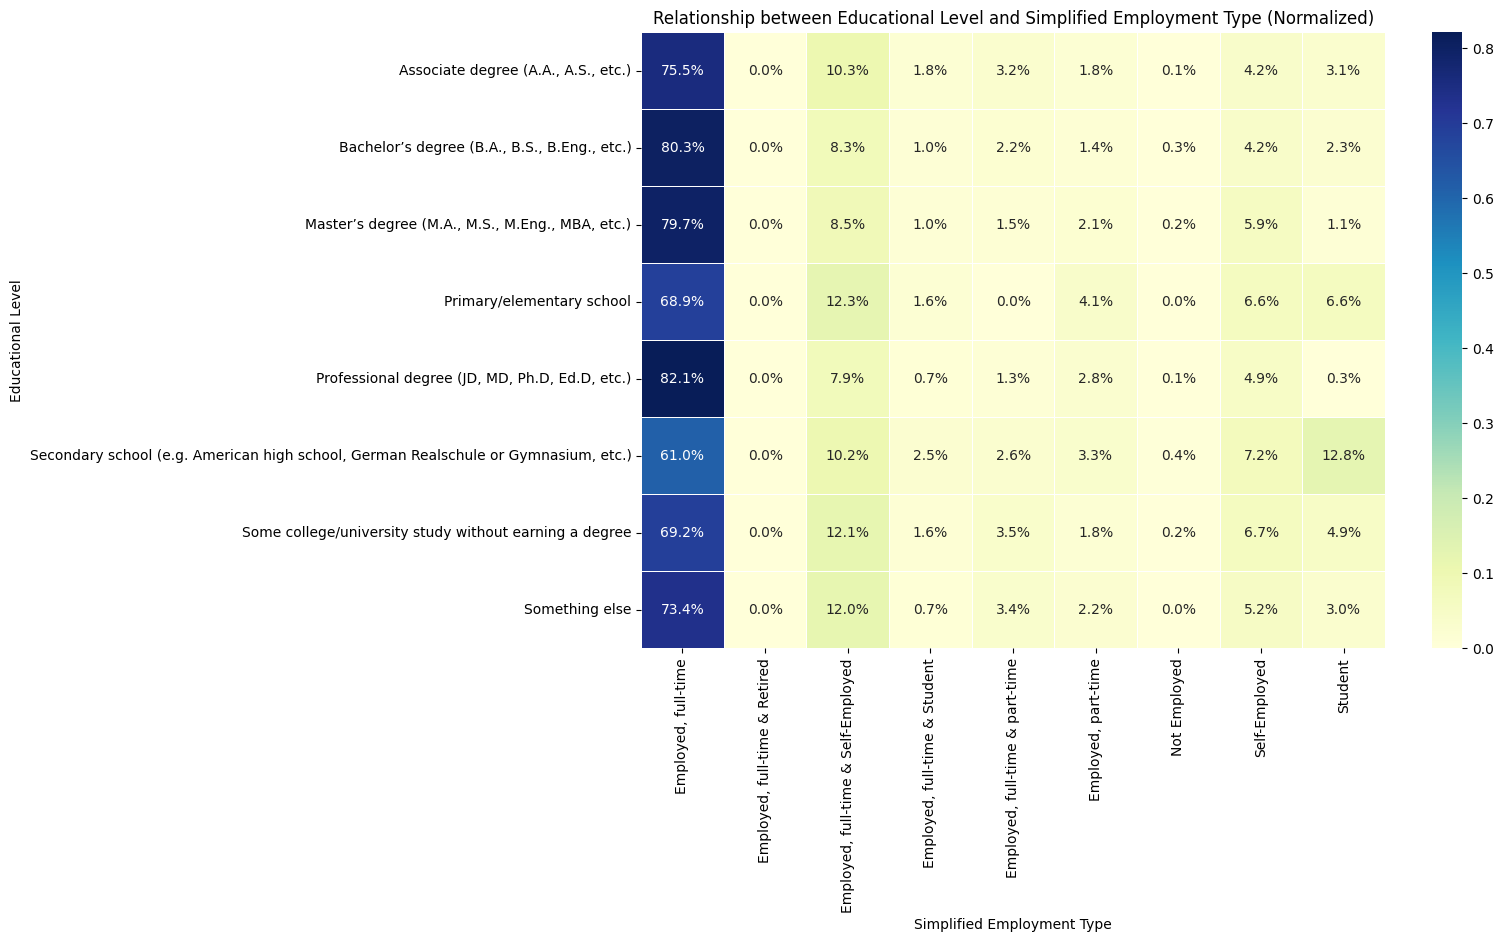

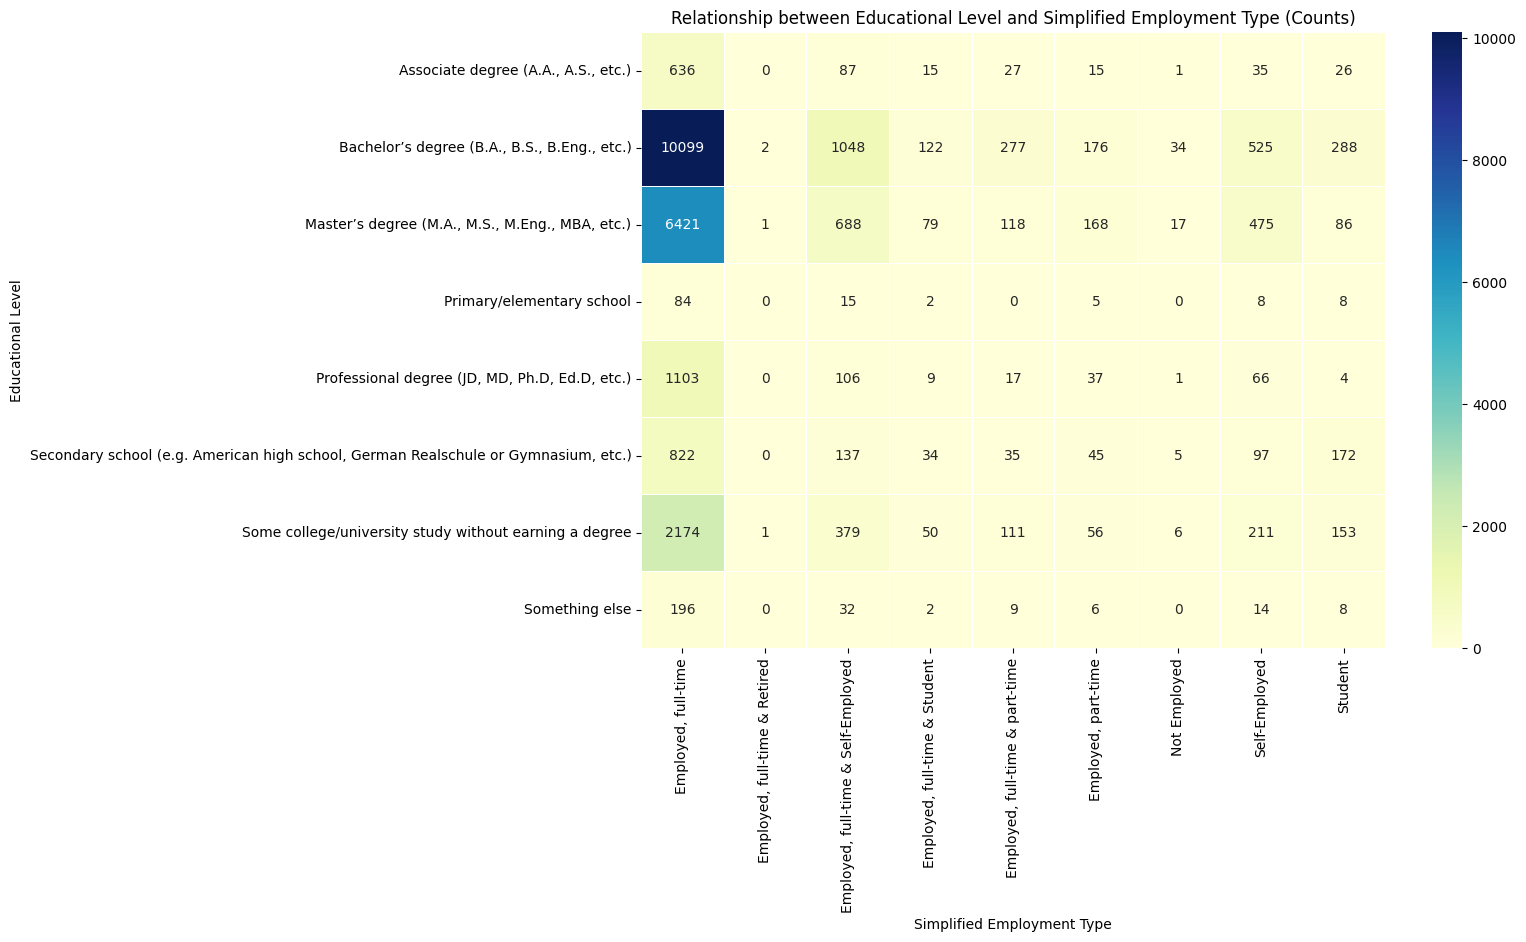

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simplify Employment categories
def simplify_employment(employment):
    if "Employed, full-time" in employment:
        if "Independent contractor" in employment or "freelancer" in employment or "self-employed" in employment:
            return "Employed, full-time & Self-Employed"
        elif "part-time" in employment:
          return "Employed, full-time & part-time"
        elif "Student" in employment:
          return "Employed, full-time & Student"
        elif "Retired" in employment:
          return "Employed, full-time & Retired"
        else:
            return "Employed, full-time"
    elif "Student" in employment:
        return "Student"
    elif "Not employed" in employment:
        return "Not Employed"
    elif "Independent contractor" in employment or "freelancer" in employment or "self-employed" in employment:
        return "Self-Employed"
    elif "Employed, part-time" in employment:
        return "Employed, part-time"
    else:
        return "Other"  # Catch-all for less frequent combinations

df['Simplified_Employment'] = df['Employment'].apply(simplify_employment)

# Cross-tabulation of EdLevel and Simplified Employment
edlevel_simplified_employment_crosstab = pd.crosstab(df['EdLevel'], df['Simplified_Employment'])

# Normalize the cross-tabulation
edlevel_simplified_employment_crosstab_normalized = edlevel_simplified_employment_crosstab.div(edlevel_simplified_employment_crosstab.sum(axis=1), axis=0)

# Visualizing the normalized cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(edlevel_simplified_employment_crosstab_normalized, annot=True, cmap="YlGnBu", fmt=".1%", linewidths=.5)
plt.title('Relationship between Educational Level and Simplified Employment Type (Normalized)')
plt.xlabel('Simplified Employment Type')
plt.ylabel('Educational Level')
plt.yticks(rotation=0)
plt.show()

# Visualizing the original cross-tabulation (Counts)
plt.figure(figsize=(12, 8))
sns.heatmap(edlevel_simplified_employment_crosstab, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)
plt.title('Relationship between Educational Level and Simplified Employment Type (Counts)')
plt.xlabel('Simplified Employment Type')
plt.ylabel('Educational Level')
plt.yticks(rotation=0)
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [36]:
# Save the cleaned and analyzed DataFrame to a new CSV file
df.to_csv('cleaned_survey_data.csv', index=False)

# If you also want to save the exploded dataframe
#df_exploded.to_csv('cleaned_survey_data_exploded.csv', index = False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
